<a href="https://colab.research.google.com/github/adeeconometrics/Math-Logic-and-Programming-/blob/master/numerical_integration.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#About the notebook
By Dave Arhur D. Amiana 

This notebook will explore both the symbolic and numerical approach to integration. We will implement naive methods as well as the API calls of such methods in the SciPy library.

Topics include: 
- Symbolic Computations
    - definite and indefinite integral
    - double and triple integrals

- Numerical Quadratures
    - Algorithms for definite numerical integration 
        - Simpson's Algorithm
        - Trapezoid Method
        - Reiman Sums
        - Quadrature
        - Adaptive Quadrature 

    - Double and Triple integrals 

In [ ]:
# import libraries
import scipy as sci
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt

# Introduction

In this notebook, we will demonstrate how to interface with Python's [Numerical](https://www.scipy.org/) and [Symbolic](https://www.sympy.org/) libraries, as well as develop algorithms for numerical methods of computation. 

<!-- discuss about the libraries, why they seem to be an imperative for scientific computation? -->

## Symbolic Computation

Symbolic Computation (also referred to as Computer Algebr Systems) is a scientific area that refers to the study and development of algorithms and software for manipulating mathematical expressions and other mathematical objects. Although computer algebra could be considered a subfield of [scientific computing](https://en.wikipedia.org/wiki/Scientific_computing), they are generally considered as distinct fields because scientific computing is usually based on numerical computation with approximate floating point numbers, while symbolic computation emphasizes exact computation with expressions containing variables that have no given value and are manipulated as symbols.

Computer algebra is widely used to experiment in mathematics and to design the formulas that are used in numerical programs. It is also used for complete scientific computations, when purely numerical methods fail, as in [public key cryptography](https://bityl.co/4fBY), or for some [non-linear problems](https://en.wikipedia.org/wiki/Non-linear).

In the following codeblocks, we will explore how to integrate definite and indefinite functions for one-dimensional and multidimensional integrals.

In [ ]:
from sympy import init_printing, N, oo
# function to output in LaTeX
init_printing()

#initialize symbols 
x,y,z,t = sp.symbols("x y z t")

let's integrate the function 
$$\int \sin(x) dx$$
we know this results to $$-\cos(x)+C$$

In [ ]:
sp.integrate(sp.sin(x), x)

let's try to integrate the definition of $\pi$

$$\pi =\int _{-1}^{1}{\frac {dx}{\sqrt {1-x^{2}}}}$$

In [ ]:
pi = 1/sp.sqrt(1-x**2)
pi_integral = sp.integrate(pi,(x,-1,1))
display(pi_integral)

# for the numerical value of π
val_pi = N(sp.integrate(pi,(x,-1,1)))
print("val_pi:", val_pi)

# we can use np.pi as reference 
print("np.pi", np.pi)

val_pi: 3.14159265358979
np.pi 3.141592653589793


let's try to integrate the following function:

$$\int\int e^{- x^{2} - y^{2}}\, dx\, dy$$

In [ ]:
sp.integrate(sp.exp(-x**2 - y**2), x,y)

let's try to integrate the following function:

$$\int_{-\infty}^{\infty}\int_{-\infty}^{\infty} e^{- x^{2} - y^{2}}\, dx\, dy$$

we know this evaluates to $\pi$

In [ ]:
sp.integrate(sp.exp(-x**2 - y**2), (x, -oo, oo), (y, -oo, oo))

In [ ]:
# using lambdify expressions

## Numerical Integration
The term numerical integration comprises a broad family of algorithms for calculating the numerical value of a definite integral, and by extension, the term is also sometimes used to describe the numerical solution of differential equations, in this notebook, we will focus on the former part which concerns itself to finding the value of a definite integral. 

The basic problem in numerical integration is to compute an approximate solution to a definite integral
$$\int_{a}^{b} f(x) dx$$

with maintaining a given degree of accuracy. With that, we will define the methods of approximation as well as the error function which bounds our approximation. 

**We should keep in mind that most definite integrals are impossible to solve exactly.**

The idea behind numerical integration is to use simple geometric shapes to approximate the area under the curve $y = f(x)$ to estimate definite integrals. 

The following are methods of numerical approximations that we will cover herein:
- Riemann Sums
- Trapezoid rule
- Simpson's rule 

### Reasons for Numerical Integration

While Computer Algebra Systems (CAS) concerns itself to "exact computations" by discerning symbolic expressions instead of numerical methods, numerical integration is especially useful for instances where performance and certain types of use-cases are required i.e. plotting and visualizations. These use-cases will be clarified as we go through this notebook.  

There are several reasons for carrying out numerical integration.

1. The integrand $f(x)$ may be known only at certain points, such as obtained by sampling. Some embedded systems and other computer applications may need numerical integration for this reason.
2. A formula for the integrand may be known, but it may be difficult or impossible to find an antiderivative that is an elementary function. An example of such an integrand is $f(x) = \exp(−x^2)$, the antiderivative of which (the error function, times a constant) cannot be written in elementary form.
3. It may be possible to find an antiderivative symbolically, but it may be easier to compute a numerical approximation than to compute the antiderivative. That may be the case if the antiderivative is given as an infinite series or product, or if its evaluation requires a special function that is not available.

In [ ]:
import scipy.integrate as int
import scipy.special as special

In [ ]:
# the return value is a tuple, with the 
# first element holding the estimated value of the integral and the second element holding an upper bound on the error
int.quad(lambda x_0: np.sin(x_0), 0,1)


(0.45969769413186023, 5.103669643922839e-15)

In previous section, we saw how to find a formula for indefinite integrals. Most CAS use a family of algorithms called the [Risch algorithms](https://en.wikipedia.org/wiki/Risch_algorithm) for finding an indefinite formula of a function. The algorithm transforms the problem of integration into a problem in algebra where a pattern that matches a given set of rules are manipulated based on the algebraic properties that elementary integal functions ought to have. 

However, there are functions that could take an awful lot of time, if not impossible to be expressed in symboic form [such function are referred to as [special functions](https://en.wikipedia.org/wiki/Lists_of_integrals#Special_functions)], to compute using the decision procedure made by the CAS algorithms (not only limited to Risch algorithms). While numerical methods suffer from the fact that it is not *exact*, we benefit from these methods for they are purely computational procedures that are efficient and good-enough in some scenarios. 

---

## Discussion on definite Integral 
The definite integral of a function $f(x)$ over an interval $[a,b]\in \mathbb{R}$ can be expressed as the limit of a summation function as it does to infinity. 

$$\int_a^b f(x) \, dx = \lim_{N \to \infty} \sum_{i=1}^N f(x_i^ * ) (x_i - x_{i-1}) \ \ , \ x_i^* \in [x_{i-1},x_i]$$

We recall that the overarching idea of Integral calculus can be thought of as the area under the curve. In the above definition, we see that the for any points of $P_0(a_0, b_0)\in I$ can be transformed into a finite series which contain the area $f(x_i^*)(x_i - x_{i-1}) \; \text{or } f(x)\;dx$.

Therein lies the motivation of the following algorithms we define below.

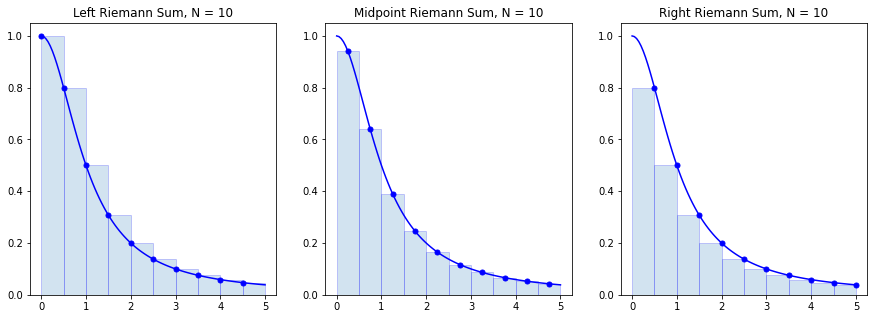

In [ ]:
# plot the approximation
%matplotlib inline

f = lambda x_0 : 1/(1+x_0**2)
a = 0; b = 5; N = 10
n = 10 # Use n*N+1 points to plot the function smoothly

x_0 = np.linspace(a,b,N+1)
y = f(x_0)

X = np.linspace(a,b,n*N+1)
Y = f(X)

plt.figure(figsize=(15,5))

plt.subplot(1,3,1)
plt.plot(X,Y,'b')
x_left = x_0[:-1] # Left endpoints
y_left = y[:-1]
plt.plot(x_left,y_left,'b.',markersize=10)
plt.bar(x_left,y_left,width=(b-a)/N,alpha=0.2,align='edge',edgecolor='b')
plt.title('Left Riemann Sum, N = {}'.format(N))

plt.subplot(1,3,2)
plt.plot(X,Y,'b')
x_mid = (x_0[:-1] + x_0[1:])/2 # Midpoints
y_mid = f(x_mid)
plt.plot(x_mid,y_mid,'b.',markersize=10)
plt.bar(x_mid,y_mid,width=(b-a)/N,alpha=0.2,edgecolor='b')
plt.title('Midpoint Riemann Sum, N = {}'.format(N))

plt.subplot(1,3,3)
plt.plot(X,Y,'b')
x_right = x_0[1:] # Left endpoints
y_right = y[1:]
plt.plot(x_right,y_right,'b.',markersize=10)
plt.bar(x_right,y_right,width=-(b-a)/N,alpha=0.2,align='edge',edgecolor='b')
plt.title('Right Riemann Sum, N = {}'.format(N))

plt.show()

### Reimann Sums
Let $ f:[a,b]\rightarrow \mathbb {R}$  be a function defined on a closed interval $[a,b]$ of the real numbers, $\mathbb {R}$ , and

$$ P=\left\{[x_{0},x_{1}],[x_{1},x_{2}],\dots ,[x_{n-1},x_{n}]\right\},$$
be a partition of $I$, where $ a=x_{0}<x_{1}<x_{2}<\cdots <x_{n}=b$.

A Riemann sum $S$ of $f$ over $I$ with partition $P$ is defined as

$$ S=\sum _{i=1}^{n}f(x_{i}^{*})\,\Delta x_{i}$$

where$ \Delta x_{i}=x_{i}-x_{i-1}$ and $x_{i}^{*}\in [x_{i-1},x_{i}].$

**Discussion**:

A Riemann sum is a certain kind of approximation of an integral by a finite sum. Riemann sums are important because they provide an easy way to approximate a definite integral.

The sum is calculated by partitioning the region into shapes (rectangles, trapezoids, parabolas, or cubics) that together form a region that is similar to the region being measured, then calculating the area for each of these shapes, and finally adding all of these small areas together. This approach can be used to find a numerical approximation for a definite integral even if the fundamental theorem of calculus does not make it easy to find a closed-form solution.

Because the region filled by the small shapes is usually not exactly the same shape as the region being measured, the Riemann sum will differ from the area being measured. This error can be reduced by dividing up the region more finely, using smaller and smaller shapes. As the shapes get smaller and smaller, the sum approaches the *Riemann integral*.

**Methods of Riemann Sums**
The methods of Reimann summation are usually best approached with partitions of equal size. The interval $[a,b]$ is therefore divided into $n$ subintervals, each of length $$\Delta x = \frac{b-a}{n}$$


- Left Reimann sum
 - if $x^*_i=x_{i-1}$ for all $i$, in $S$ 
$${\displaystyle A_{\mathrm {left} }=\Delta x\left[f(a)+f(a+\Delta x)+\cdots +f(b-\Delta x)\right].}$$

- Right Reimann sum
   - if $x^*_i=x_{i-1}$ for all $i$, in $S$ 
$${\displaystyle A_{\mathrm {right} }=\Delta x\left[f(a+\Delta x)+f(a+2\,\Delta x)+\cdots +f(b)\right].}$$

- Middle Reimann sum
   - if ${(x_{i}+x_{i-1})/2}$ for all $i$, in $S$
$${\displaystyle A_{\mathrm {mid} }=\Delta x\left[f(a+{\tfrac {\Delta x}{2}})+f(a+{\tfrac {3\,\Delta x}{2}})+\cdots +f(b-{\tfrac {\Delta x}{2}})\right]}.$$


**Error Function**

In [ ]:
int.quad(lambda x: np.sin(x), 0,np.pi)

In [ ]:
def left_r_sum(a,b, n=1000):
    dx = np.abs(b-a)/n
    x_l = np.linspace(a,b-dx,n)
    f = np.sin(x_l)
    return np.sum(f*dx)

def right_r_sum(a,b,n=1000):
    dx = np.abs(b-a)/n
    x_r = np.linspace(dx,b,n)
    f = np.sin
    return np.sum(f(x_r)*dx)

def mid_r_sum(a,b,n=1000):
    dx = np.abs(b-a)/n
    x_m = np.linspace(dx/2, b-dx/2,n)
    f = np.sin
    return np.sum(f(x_m)*dx)

print("left sum: ", left_r_sum(0,np.pi), "\n right sum: ", right_r_sum(0,np.pi), "\n midpoint: ", mid_r_sum(0,np.pi))

left sum:  1.9999983550656626 
 right sum:  1.9999983550656628 
 midpoint:  2.0000008224672703


In [ ]:
# error bounds

In [ ]:
def riemann_sum(f,a,b,N,method='midpoint'):
    '''Compute the Riemann sum of f(x) over the interval [a,b].

    Parameters
    ----------
    f : function
        Vectorized function of one variable
    a , b : numbers
        Endpoints of the interval [a,b]
    N : integer
        Number of subintervals of equal length in the partition of [a,b]
    method : string
        Determines the kind of Riemann sum:
        right : Riemann sum using right endpoints
        left : Riemann sum using left endpoints
        midpoint (default) : Riemann sum using midpoints

    Returns
    -------
    float
        Approximation of the integral given by the Riemann sum.
    '''
    dx = (b - a)/N
    x = np.linspace(a,b,N+1)

    if method == 'left':
        x_left = x[:-1]
        return np.sum(f(x_left)*dx)
    elif method == 'right':
        x_right = x[1:]
        return np.sum(f(x_right)*dx)
    elif method == 'midpoint':
        x_mid = (x[:-1] + x[1:])/2
        return np.sum(f(x_mid)*dx)
    else:
        raise ValueError("Method must be 'left', 'right' or 'midpoint'.")

## Composite Trapezoidal rule

The idea here is to replace the true graph by a set of straight line segments, which we may view as the area be composed of trapezoids. As a reminder, the area of a trapezoid is: $A_T=\tfrac{a + b}{2} h$. We use the following property of definite integrals to deriving our numerical solution:

$$\int_{a}^{b} f(x)\ dx = \int_{a}^{c} f(x)\ dx\ + \int_{c}^{b} f(x) \ dx \text{ such that } a<c<b$$

with this, we can derive our solution for $n$ partitions of our integral and express it as follows:

$$
\begin{aligned} 
\int_{a}^{b} f(x)\ dx &= \int_{x_0}^{x_1} f(x)\ dx\ + \int_{x_1}^{x_2} f(x) \ dx + ... + \int_{x_{n-1}}^{x_n} f(x)\ dx  \\ &\approx h\frac{f(x_0)+f(x_1)}{2} + h\frac{f(x_1)+f(x_2)}{2}+...+ h\frac{f(x_{n-1})+f(x_n)}{2}
\end{aligned}
 $$

 Which we can express more compactly as: 
 $$\int_{a}^{b} f(x)\ dx \approx h \Big(\frac{1}{2} f(x_0)+\sum_{i=1}^{n-1}f(x_i) + \frac{1}{2} f(x_n)\Big)$$

In [ ]:
# composite trapezoidal rule
def trapezoid(f,x,n, dx=1e-15):
    pass

### $\Gamma$-function:

$$\Gamma(x) := \int^{\infty}_{0} t^{x-1} e^{-t} \mathrm{d}t.$$

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: IntegrationWarning: The algorithm does not converge.  Roundoff error is detected
  in the extrapolation table.  It is assumed that the requested tolerance
  cannot be achieved, and that the returned result (if full_output = 1) is 
  the best which can be obtained.
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be us

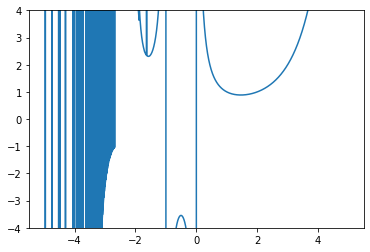

In [ ]:
def integrand_gamma(t_,x_):
     return t_**(x_-1)*np.exp(-t_)

def gm(x_):
    return int.quad(integrand_gamma, 0, np.inf, args=(x_))[0]

vec_gamma = np.vectorize(gm)

x_0 = np.linspace(-5,5,10000)
y_0 = vec_gamma([i for i in x_0])
plt.plot(x_0, y_0)

plt.ylim(-4,4)

$$E_n(x)=\int_{1}^{\infty} \frac{e^{-xt}}{t^n} dt$$

In [ ]:
def integrand(t, n, x):
    return np.exp(-x*t) / t**n

def expint(n, x):
    return int.quad(integrand, 1, np.inf, args=(n, x))[0]

vec_expint = np.vectorize(expint)

y_5 = vec_expint(4, x_0)

# plt.plot(x_0, y_5)
y_5

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in exp
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  """


array([       inf,        inf,        inf, ..., 0.00078474, 0.00078386,
       0.00078298])

In [ ]:
# plot integral
def a(a): 
    return int.quad(lambda x: np.sin(x),0,1)[0]

y_3 = np.array([a(i) for i in x_0])[0]
plt.plot(x_0,y_3)

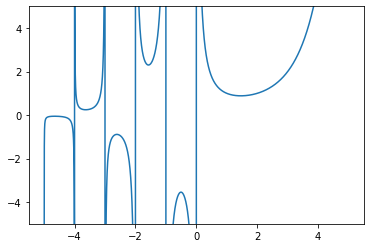

In [ ]:
# plot the gamma function

x_0 = np.linspace(-5,5, 10000)
y = np.array([special.gamma(i) for i in x_0])

plt.plot(x_0,y)
plt.ylim(-5,5)